# Принятие решений в бизнесе

**Заказчик** - Интернет-магазин

**Цель проекта**

- Необходимость приоритизировать гипотезы из списка гипотез, предоставленных отделом Маркетинга;

- Анализ результатов проведенного А/В-тестирования и аргументация решения по результатам теста.

Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

**Ход исследования:**

-Обзор и предобработка данных;

-Приоритезация гипотез;

-Анализ А/В-теста;


**В ходе исследования будут применены методы приоритезации гипотез ICE, RICE, а также построены графики по кумулятивным метрикам.**

## Описание проекта, описание данных, загрузка и импорт библиотек

Аналитик крупного интернет-магазина вместе с отделом маркетинга подготовил список гипотез для увеличения выручки.

**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as stats
import warnings

from scipy import stats as st

In [2]:
# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

**Загрузка данных**

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Обзор датафрейма **hypothesis**

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
hypothesis.isna().sum() #проверяем наличие пропусков

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [7]:
hypothesis.duplicated().sum() #проверяем наличие дубликатов

0

Обзор датафрейма **orders**

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
orders.isna().sum() #проверяем наличие пропусков

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
orders.duplicated().sum() #проверяем наличие дубликатов

0

Обзор датафрейма **visitors**

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
visitors.isna().sum() #проверяем наличие пропусков

date        0
group       0
visitors    0
dtype: int64

In [15]:
visitors.duplicated().sum() #проверяем наличие дубликатов

0

**Вывод**:

- необходимо исправить тип данных в столбцах с датами
- привести название столбцов к нижнему регистру
- пропусков и дубликатов не выявлено

**Предобработка данных**

In [16]:
# изменение типа данных для столбцов с датами

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [17]:
# приведение наименования столбцов к нижнему регистру

hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

## Часть I. Приоритизация гипотез

По датафрейму hypothesis видно, что отдел маркетинга подготовил 9 гипотез.

### Применение фреймворка ICE для приоритизации гипотез. Отсортирование их по убыванию приоритета.

Применим метод приоритезации гипотез - ICE (от. англ.: Impact, Confidence, Effort/ Влияние, Уверенность, Усилия).

In [18]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],2)

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False).head(5)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00


По фреймворку ICE приоритетнее оказались гипотезы:

- Запустить акцию, дающую скидку на товар в день рождения

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Применение фреймворка RICE для приоритизации гипотез. Отсортирование их по убыванию приоритета.

Применим метод приоритезации гипотез - RICE (от. англ.:Reach (охват), Impact, Confidence, Effort/ Влияние, Уверенность, Усилия).

In [19]:
hypothesis['rice'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],2)

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


По фреймворку RICE приоритетнее оказались гипотезы:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

### Вывод

По мотоду ICE и RICE приоритет выпал на одни и те же гипотезы,однако сама очередность приоритетов разная.

С учетом охвата на первом месте по приоритету стоит гипотеза о добавлении формы подписки на все основные страницы ресурса.
Без учета охвата - акция со скидкой в день рождение.

Без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу и идея с изменением цвета фона главной страницы).

In [20]:
hypothesis[['hypothesis','ice', 'rice']].sort_values(by='rice', ascending=False).head(5)

,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.2


Разница приоритезиций заключается в том, что метод RICE учитывает кол-во пользователей, которых затронут изменения, поскольку в нем есть элемент REACH (охват), а метод ICE - нет.

## Часть II. Анализ A/B-теста

Чтобы построить графики по кумулятивным метрикам, необходимо собрать агрегированный датафрейм, содержащий информацию о дате, группе (А или В), кумулятивных количестве заказов и пользователей их оформивших, среднем чеке, о кумулятивном количестве посетителей магазина.

In [21]:
#создаем массив уникальных пар значений дат и групп теста

datesGroups = orders[['date','group']].drop_duplicates()

#получаем агрегированные кумулятивные по дням данные о заказах 

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#получаем агрегированные кумулятивные по дням данные о посетителях

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


### Построение графика кумулятивной выручки по группам. Выводы и предположения

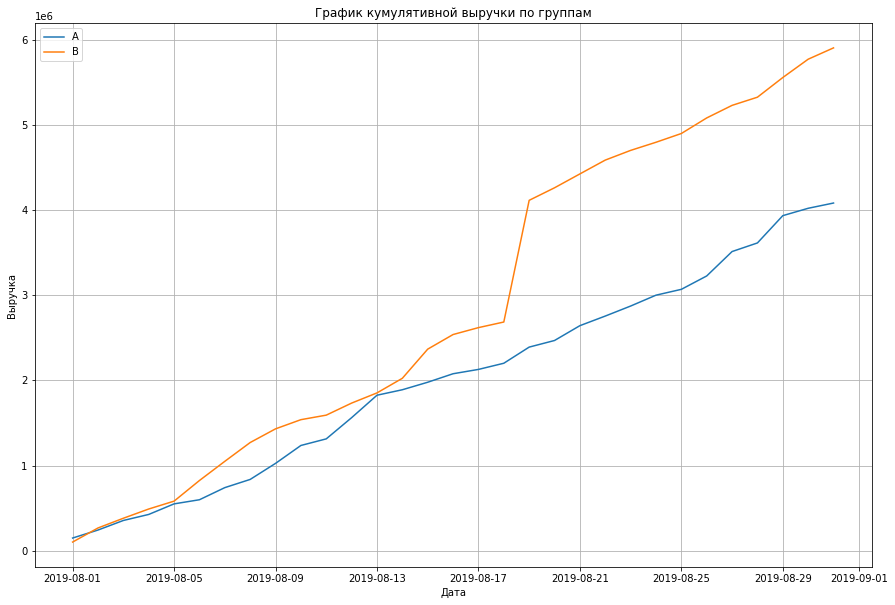

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 10))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()

Мы видим, что кумулятивная выручка группы А растет линейно, и она меньше, чем у группы В.
При этом в группе В есть резкий скачок в районе 18-го августа, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Построение графика кумулятивного среднего чека по группам. Выводы и предположения

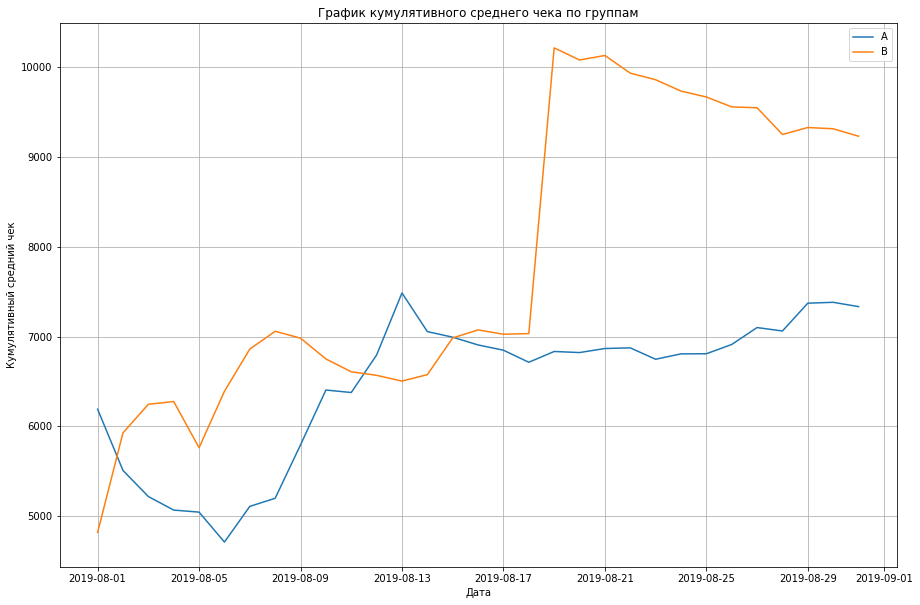

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.grid()
plt.legend()
plt.show()

Кумулятивный средний чек группы B имеет аномальный рост в середине теста(присерно 18 августа). Скорее всего, в эту дату произошли очень крупные покупки.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения

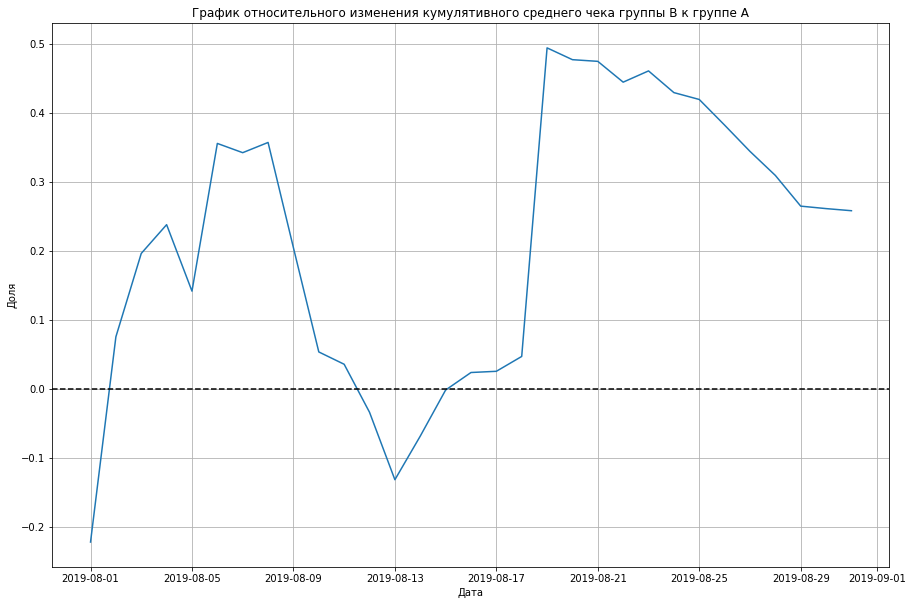

In [24]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.grid()
plt.show()

По графику можно предположить наличие крупных заказов.

### Построение графика кумулятивного среднего количества заказов на посетителя по группам. Выводы и предположения

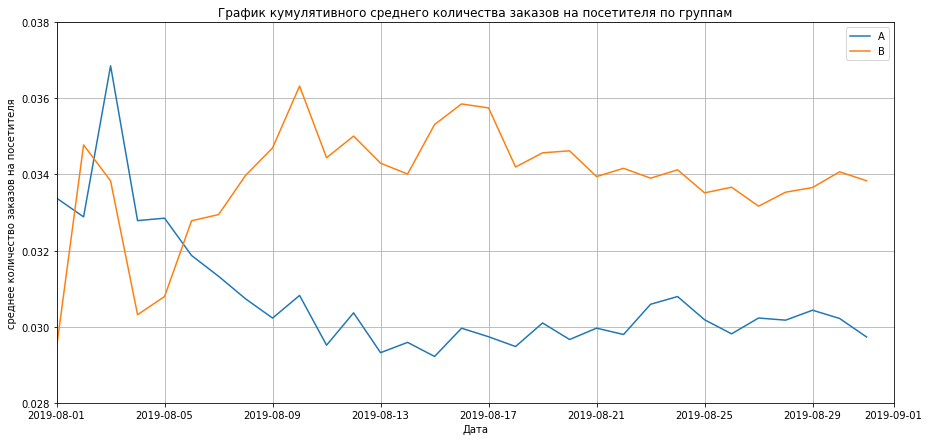

In [25]:
# считаем кумулятивную среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

Кумулятивное среднее количество заказов в группе B значительно выше, чем в группе А. При этом до 5 августа показатель был приблизительно одинаковый.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Выводы и предположения

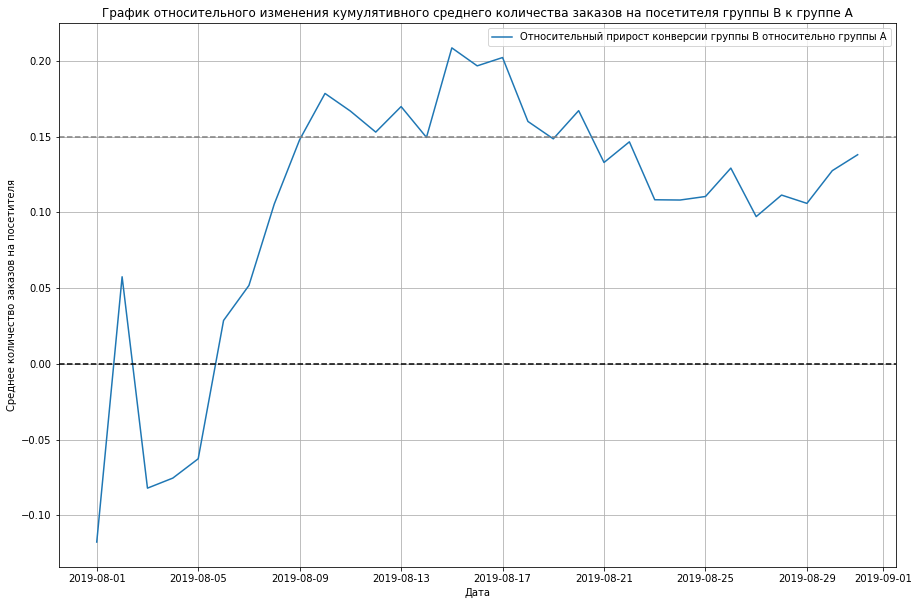

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#строим график
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
# добавляем оси
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

По графику видно, что группа B лидирует после 5-го дня теста.

### Построение точечного графика количества заказов по пользователям. Выводы и предположения

In [27]:
#Подсчитаем количество заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitorid', 'transactionid']

print(ordersByUsers.sort_values(by='transactionid', ascending=False).head(10))

       visitorid  transactionid
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5
744   3062433592              5
55     237748145              5
917   3803269165              5
299   1230306981              5
897   3717692402              5


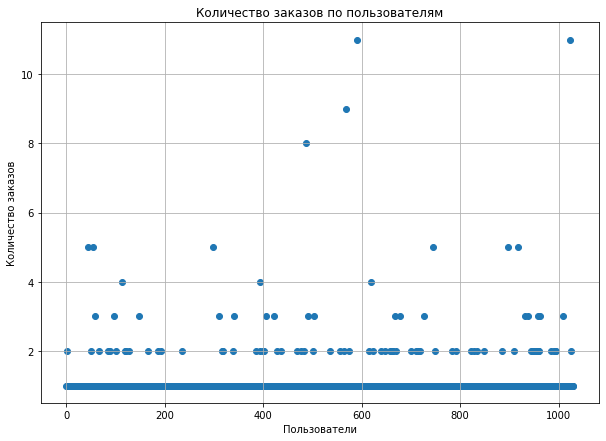

In [28]:
#Строим график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, ordersByUsers['transactionid'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.grid()
plt.show()

По графику можно наблюдать аномальное количество заказов (более 4). Чаще всего пользователи совершали покупки до 2ух раз.

###  Подсчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [29]:
print(np.percentile(ordersByUsers['transactionid'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% - четыре и более.
Примем за верхнюю границу 4 заказа на одного пользователя.

### Построение точечного графика стоимостей заказов. Выводы и предположения

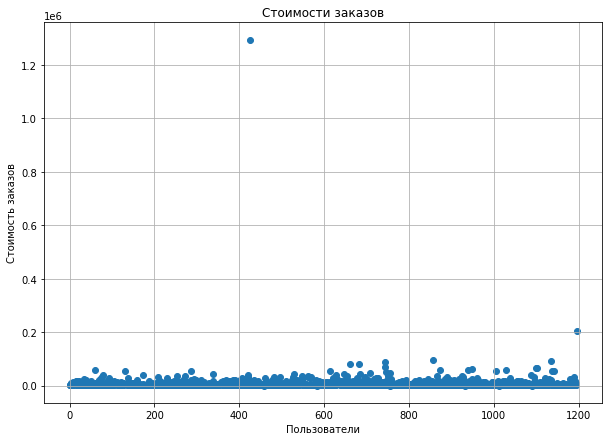

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 7))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов")
plt.grid()
plt.show()

По графику можно отметить два заказа которые значительно выбиваются.

### Подсчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов

In [31]:
print(np.percentile(orders['revenue'] , [95, 99]))

[28000.  58233.2]


Не более 5% пользователей потратили более 28 тыс, 1% пользователей потратили более 58,2 тыс.

За порог аномалии примеме тех, кто постратил свыше 30 тыс.

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Выводы и предположения

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 

Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. 

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [33]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

**Нулевая гипотеза H0**:Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет;

**Альтернаятивгая гипотеза H1**:Среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть.

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'transactionid']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'transactionid'] 
sampleA = pd.concat([ordersByUsersA['transactionid'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionid'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionid'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionid'])), name='orders')],axis=0)
print('P-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительные различия: 0.138


**Поскольку P-value меньше 0.05, значит стоит отвергнуть нулевую гипотезу.**

А также можно отметить, что в среднем количестве заказов между группами есть статистически значимые различия. 

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения

**Нулевая гипотеза H0**:Средние чеки групп A и B равны, статистически значимых отличий нет;

**Альтернаятивная гипотеза H1**:Средние чеки групп A и B различны, статистически значимые отличия есть.

In [35]:
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value: 0.729
Относительные различия: 0.259


**Поскольку P-value больше 0.05, статистически значимых отличий в среднем чеке между группами нет.**

А также, относительное различие среднего чека между сегментами около 26%.

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Выводы и предположения

Для очищения данных найдем аномальных пользователей тех, кто потратил более 30 тыс, либо совершил 4 и более заказов, и добавим их список аномальных.

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionid'] > 4]['visitorid'],
        ordersByUsersB[ordersByUsersB['transactionid'] > 4]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей. 

Выведем p-value для сравнения среднего между очищенными группами. 
Округлим p-value до трех знаков после запятой. 
Выведем относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['transactionid'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionid'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('P-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.019
Относительные различия: 0.144


По "очищенным данным" выводы такие же как и по "сырым" данным.

### Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения

In [38]:
print('P-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.979
Относительные различия: -0.017


Значение p-value увеличилось до 0.979, но относительные различия уменьшились, что говорит о том, что данные без аномальных значений.

Есть статистически значимое различие в среднем количестве заказов на посетителя между группами по "очищенным" данным и по "сырым данным".

Нет статистически значимого различия в среднем чеке заказа между группами ни по «сырым», ни по данным после фильтрации аномалий;

График различия среднего количества заказов на посетителя между группами сообщает, что результаты группы B лучше группы A.

График различия среднего чека говорит о том, что результаты группы B лучше группы А.

### Решение по результатам теста

На основании подсчетов можно сделать вывод: **Остановить тест, зафиксирована победа группы B.**

## Вывод

**Аналитик крупного интернет-магазина вместе с отделом маркетинга подготовил список гипотез для увеличения выручки.**


**Файл /datasets/hypothesis.csv.**

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.



**Файл /datasets/orders.csv.**

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.


**Файл /datasets/visitors.csv.**

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста


**При подготовительной работе с данными был исправлен тип данных в столбцах с датами, приведены названия столбцов к нижнему регистру. Пропусков и дубликатов не выявлено.**


**При применении метода ICE приоритетенее оказались гипотезы:**

- Запустить акцию, дающую скидку на товар в день рождения

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**При применении метода RICE приоритетенее оказались гипотезы:**

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**Для анализа A/B теста были выполнены следующие дейтсвия:**

- создан массив уникальных пар значений дат и групп теста
- получены агрегированные кумулятивные по дням данные о заказах 
- получены агрегированные кумулятивные по дням данные о посетителях
- объединены кумулятивные данные в одной таблице и присвоены ее столбцам новые названия

**По кумулятивным метрикам были построены графики:**

- график кумулятивной выручки по группам (показал, что кумулятивная выручка группы А растет линейно, и она меньше, чем у группы В. При этом в группе В есть резкий скачок в районе 18-го августа, что может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.)

- график кумулятивного среднего чека по группам (показал, что кумулятивный средний чек группы B имеет аномальный рост в середине теста(присерно 18 августа). Скорее всего, в эту дату произошли очень крупные покупки.)

-  график относительного изменения кумулятивного среднего чека группы B к группе A (показал, наличие крупных заказов)

- график кумулятивного среднего количества заказов на посетителя по группам (показал, что кумулятивное среднее количество заказов в группе B значительно выше, чем в группе А. При этом до 5 августа показатель был приблизительно одинаковый.)

- график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A (показал, что  группа B лидирует после 5-го дня теста.)

- точечный график количества заказов по пользователям (показал, что можно наблюдать аномальное количество заказов (более 4). Чаще всего пользователи совершали покупки до 2ух раз. Не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% - четыре и более. Примем за верхнюю границу 4 заказа на одного пользователя.)

-  точечный график стоимостей заказов (показал, что  два заказа которые значительно выбиваются. Не более 5% пользователей потратили более 28 тыс, 1% пользователей потратили более 58,2 тыс.)

**Был произведен расчет статистической значимости:**

- различий в среднем количестве заказов на посетителя между группами по «сырым» данным (по результатам которого была отвергнута гипотеза о том, что среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет)

- различий в среднем чеке заказа между группами по «сырым» данным (по результататм которого выявлено, что статистически значимых отличий в среднем чеке между группами нет, а также, относительное различие среднего чека между сегментами около 26%.)

- различий в среднем количестве заказов на посетителя между группами по «очищенным» данным и различий в среднем чеке заказа между группами по «очищенным» данным, которые подвердили выводы сделанные по "сырым данным", за исключением уменьшения относительного различия.

По итогу было принято решение: **Остановить тест, зафиксирована победа группы B.**
